The following cell should always be the first coding cell of your python notebooks

In [1]:

student_id = raw_input('Please enter your NETID (e.g. ydubief)')
print(student_id)
assignment_name = student_id+'_HW0'


Please enter your NETID (e.g. ydubief)ydubief
ydubief


In [52]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')


from IPython.display import display,Image, Latex

from IPython.display import clear_output

import SchemDraw as schem
import SchemDraw.elements as e

import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc

import sympy as sym

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 18,
        }


from scipy.constants.constants import C2K
from scipy.constants.constants import K2C
from scipy.constants.constants import F2K
from scipy.constants.constants import K2F
from scipy.constants.constants import C2F
from scipy.constants.constants import F2C

<h3> Heat loss through a single-pane window</h3>

Consider a 0.8 m high and 1.5 m wide window with a thickness of 8 mm and a thermal conductivity of $k=0.78$ W/m.K. The room maintained at 20$^\circ$ C and the outside is at -10$^\circ$ C. The inner and outer convection coefficients are $h_1=10$ W/m$^2$.K and $h_2=40$ W/m$^2$.K
<ol>
<li> Draw the thermal circuit of the problem.</li>
<li> Compute the heat transfer through the window.</li>
<li> Plot the temperature distribution across the window glass.</li>
</ol>

In [53]:
PDF('figures/window-single-pane-fig.pdf',size=(600,500))

####Parameters

In [54]:
H = 0.8 #m Height
W = 1.5 #m Width
t = 8e-3 #m window thickness

A = H*W #m^2 window surface area
k_glass = 0.78 #W/m.K thermal conductivity of glass

T_inf_in = 20 #C
T_inf_out = -10 #C
h_in = 10.
h_out = 40.

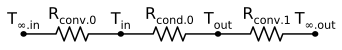

In [55]:

from Libraries import HT_thermal_resistance as res
from Libraries import thermodynamics as thermo

Rth = []
Rth.append(res.Resistance('$R_{conv.0}$','W'))
Rth.append(res.Resistance('$R_{cond.0}$','W'))
Rth.append(res.Resistance('$R_{conv.1}$','W'))
d = schem.Drawing()
d.add( e.DOT, label='$T_{\infty.in}$')
d.add( e.RES, d='right', label=Rth[0].name )
d.add( e.DOT, label='$T_{in}$')
d.add( e.RES, d='right', label=Rth[1].name )
d.add( e.DOT, label='$T_{out}$')
d.add( e.RES, d='right', label=Rth[2].name )
d.add( e.DOT, label='$T_{\infty.out}$')
d.draw()


#d.save( 'testschematic.eps' )

In [56]:
# definition of thermal resistances
Rth[0].convection(h_in,A,'h_{c.i}','A','T_{in.\infty}','T_{in.glass}')
Rth[1].conduction('plane',k_glass,t,0.,A,'k_{glass}','t','none','A','T_{in.glass}','T_{out.glass}')
Rth[2].convection(h_out,A,'h_{c.o}','A','T_{out.glass}','T_{out.\infty}')


#Verification of equations:
for i in range(len(Rth)):
    print("Thermal element # %2i" %i)
    Rth[i].display_equation(i)


Thermal element #  0


     T_{in.\infty} - T_{in.glass}
q₀ = ────────────────────────────
              R_{conv.0}         

q₀ = A⋅h_{c.i}⋅(T_{in.\infty} - T_{in.glass})

Thermal element #  1


     T_{in.glass} - T_{out.glass}
q₁ = ────────────────────────────
              R_{cond.0}         

     A⋅k_{glass}⋅(T_{in.glass} - T_{out.glass})
q₁ = ──────────────────────────────────────────
                         t                     

Thermal element #  2


     -T_{out.\infty} + T_{out.glass}
q₂ = ───────────────────────────────
                R_{conv.1}          

q₂ = A⋅h_{c.o}⋅(-T_{out.\infty} + T_{out.glass})

In [57]:

# compute total resistance
Rtotal = res.serial_sum(Rth,0,2)
print('Total thermal resistance: %3.3f' %Rtotal)
q = (T_inf_in-T_inf_out)/Rtotal
print('Heat transfer: %4.2f W' %q)
T_in = T_inf_in-q*Rth[0].R
print('Surface temperature of the window (inside): %3.1f F' %C2F(T_in))
T_out = T_in-q*Rth[1].R
print('Surface temperature of the window (outside): %3.1f F' %C2F(T_out))


Total thermal resistance: 0.113
Heat transfer: 266.16 W
Surface temperature of the window (inside): 28.1 F
Surface temperature of the window (outside): 24.0 F


<h3>Double-pane window</h3>

Repeat the same exercise but now with a double pane window, consisting of two glass windows of the same dimensions as before and a sealed gap filled with gas (gap thickness: 8 mm). Determine the heat loss and pressure distribution across the window when the gap is filled with air, argon and krypton.



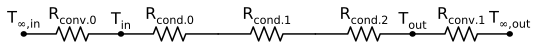

In [58]:
import SchemDraw as schem
import SchemDraw.elements as e

from Libraries import HT_thermal_resistance as res
from Libraries import thermodynamics as thermo

L = 0.8
W = 1.5

A = L*W
h = 8.e-3
h_0 =10.
h_1 = 40.
k_glass = 0.78
T_inf_in = 20.
T_inf_out = -10.
t_glass = 0.008 #m
t_gas = 0.008 #m
Rth = []
Rth.append(res.Resistance('$R_{conv.0}$','W'))
Rth.append(res.Resistance('$R_{cond.0}$','W'))
Rth.append(res.Resistance('$R_{cond.1}$','W'))
Rth.append(res.Resistance('$R_{cond.2}$','W'))
Rth.append(res.Resistance('$R_{conv.1}$','W'))
d = schem.Drawing()
d.add( e.DOT, label='$T_{\infty,in}$')
d.add( e.RES, d='right', label=Rth[0].name )
d.add( e.DOT, label='$T_{in}$')
d.add( e.RES, d='right', label=Rth[1].name )
d.add( e.RES, d='right', label=Rth[2].name )
d.add( e.RES, d='right', label=Rth[3].name )
d.add( e.DOT, label='$T_{out}$')
d.add( e.RES, d='right', label=Rth[4].name )
d.add( e.DOT, label='$T_{\infty,out}$')
d.draw()
#d.save( 'testschematic.eps' )

In [59]:

gas = thermo.Fluid('air')
T_f = 0.5*(T_inf_in+T_inf_out)
print("Fluid temperature in the gas space: %3.3f C" %T_f)
gas.get_properties(C2K(T_f))
Rth[0].convection(h_0,A,'h_{c.i}','A','T_{in.\infty}','T_{in.glass}')
Rth[1].conduction('plane',k_glass,t_glass,0.,A,'k_{glass}','t_{glass}','none','A','T_{in.glass}','T_{in.gas}')
Rth[2].conduction('plane',gas.k,t_gas,0.,A,'k_{gas}','t_{gas}','none','A','T_{in.gas}','T_{out.gas}')
Rth[3].conduction('plane',k_glass,t_glass,0.,A,'k_{glass}','t_{glass}','none','A','T_{out.gas}','T_{out.glass}')
Rth[4].convection(h_1,A,'h_{c.out}','A','T_{out.\infty}','T_{out.glass}')

#Verification of equations:
for i in range(len(Rth)):
    print("Thermal element # %2i" %i)
    Rth[i].display_equation(i)




Fluid temperature in the gas space: 5.000 C
Thermal element #  0


     T_{in.\infty} - T_{in.glass}
q₀ = ────────────────────────────
              R_{conv.0}         

q₀ = A⋅h_{c.i}⋅(T_{in.\infty} - T_{in.glass})

Thermal element #  1


     -T_{in.gas} + T_{in.glass}
q₁ = ──────────────────────────
             R_{cond.0}        

     A⋅k_{glass}⋅(-T_{in.gas} + T_{in.glass})
q₁ = ────────────────────────────────────────
                    t_{glass}                

Thermal element #  2


     T_{in.gas} - T_{out.gas}
q₂ = ────────────────────────
            R_{cond.1}       

     A⋅k_{gas}⋅(T_{in.gas} - T_{out.gas})
q₂ = ────────────────────────────────────
                   t_{gas}               

Thermal element #  3


     T_{out.gas} - T_{out.glass}
q₃ = ───────────────────────────
              R_{cond.2}        

     A⋅k_{glass}⋅(T_{out.gas} - T_{out.glass})
q₃ = ─────────────────────────────────────────
                     t_{glass}                

Thermal element #  4


     T_{out.\infty} - T_{out.glass}
q₄ = ──────────────────────────────
               R_{conv.1}          

q₄ = A⋅h_{c.out}⋅(T_{out.\infty} - T_{out.glass})

In [60]:
Rtotal = res.serial_sum(Rth,0,4)
print('Total thermal resistance: %3.3f' %Rtotal)
q = (T_inf_in-T_inf_out)/Rtotal
print('Heat transfer: %4.2f W' %q)
T_in = T_inf_in-q*Rth[0].R
print('Surface temperature of the window (inside): %3.1f F' %C2F(T_in))
T_out = T_in-q*Rth[1].R
print('Surface temperature of the window (inside): %3.1f F' %C2F(T_out))
q = (T_inf_in-T_inf_out)/Rtotal
T = np.zeros(len(Rth)+1)
T[0] = T_inf_in
for i in range(1,len(Rth)+1):
    T[i] = T[i-1] - q*Rth[i-1].R
T_air = np.copy(T)

Total thermal resistance: 0.392
Heat transfer: 76.59 W
Surface temperature of the window (inside): 56.5 F
Surface temperature of the window (inside): 55.3 F


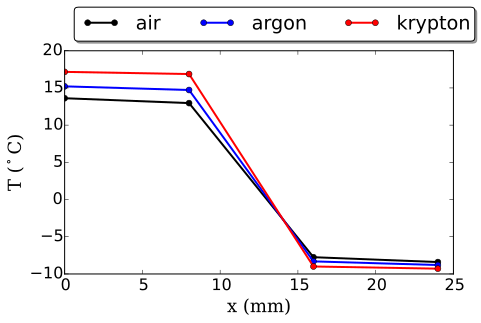

In [61]:
x = np.array([-100., 0., 8., 16., 24., 100.])
plt.plot(x[1:-1],T_air[1:-1],'ko-',lw=2,label='air')
plt.plot(x[1:-1],T_argon[1:-1],'bo-',lw=2,label='argon')
plt.plot(x[1:-1],T_krypton[1:-1],'ro-',lw=2,label='krypton')
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$x$ ($mm$)', fontdict = font)
plt.ylabel('$T$ ($^\circ C$)', fontdict = font)
plt.show()

<h3>Storm window</h3>
We now look at the heat loss through a storm window, which consists of two single pane windows separated by a wide, poorly sealed gap of air. The gap is $L=5cm$ wide.

In [65]:

from Libraries import HT_natural_convection_enclosure as ncconvenc
t = 0.008
L = 0.05
T_f = 0.5*(T_inf_in+T_inf_out)
air = thermo.Fluid('air')
air.get_properties(C2K(T_f))
# calculate Ra for natural convection
Ra_L = ncconvenc.Ra(9.81,air.beta,T_inf_in-T_inf_out,L,air.nu,air.alpha)
print("Rayleigh number: %1.3e" %Ra_L)
Nu = ncconvenc.Nu_vertical_enclosure(Ra_L,air.Pr,H,L)
print("Nussel number: %3.3f" %Nu)
h_cgap = air.k*Nu/H
print(h)


Rayleigh number: 4.975e+05
ok
Nussel number: 4.835
0.148992809835


In [13]:
array = np.genfromtxt('Libraries/Tables/Argon1atm.csv', delimiter=',', skip_header = 1, unpack=True, dtype=float)

In [23]:
!ipython nbconvert --to html Problem-Template0.ipynb --output $student_id

[NbConvertApp] Converting notebook Problem-Template0.ipynb to html
[NbConvertApp] Writing 319091 bytes to ydubief.html
